SKN14_1Team

In [1]:
# 아는 애들 다 불러모으기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm # 한글 폰트 사용

# !pip install missingno # 결측치 분석 전용 라이브러리 설치
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 표현
plt.rcParams['axes.unicode_minus'] = False # 마이너스(-) 표현

In [2]:
# 데이터 프레임 불러 오기
df = pd.read_csv('internet_service_churn.csv')

# shape (72274, 11)72,274행 11열
df.shape

(72274, 11)

In [3]:

# 데이터 기본 정보 총 11개의 행이 모두 숫자형(dtypes: float64(4), int64(7))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB
None


In [4]:

# 상위 10개 행 보기
df.head(10)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1
7,84,0,0,5.48,14,NaN,1,0.0,0.0,0,1
8,94,0,0,8.54,0,NaN,0,0.0,0.0,0,1
9,112,0,0,8.33,0,NaN,0,0.0,0.0,0,1


In [5]:

# 간단하게 결측치와 이상치 시각 탐색 - 평균, 중위값 등과 차이가 큰 컬럼 일단 의심
# 결측치 3개 확인 reamining_contract, download_avg, upload_avg
# 이상치 의심 subscription_age, bill_avg, reamining_contract,
round(df.describe(), 2)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,72274.00,72274.00,72274.00,72274.00,72274.00,50702.00,72274.00,71893.00,71893.00,72274.00,72274.00
mean,846318.24,0.82,0.33,2.45,18.94,0.72,0.27,43.69,4.19,0.21,0.55
std,489102.17,0.39,0.47,2.03,13.22,0.70,0.82,63.41,9.82,1.00,0.50
min,15.00,0.00,0.00,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,422216.50,1.00,0.00,0.93,13.00,0.00,0.00,6.70,0.50,0.00,0.00
50%,847784.00,1.00,0.00,1.98,19.00,0.57,0.00,27.80,2.10,0.00,1.00
75%,1269562.00,1.00,1.00,3.30,22.00,1.31,0.00,60.50,4.80,0.00,1.00
max,1689744.00,1.00,1.00,12.80,406.00,2.92,19.00,4415.20,453.30,7.00,1.00


In [6]:

# target = churn 적정성 확인 (1 = 40,050개 0 = 32,224, 결측치 없고, 0과 1 이진값)
df['churn'].value_counts()

churn
1    40050
0    32224
Name: count, dtype: int64

In [7]:

# 1과 0의 비율 확인 (1 = 55% 0 = 45%) 치우치지 않고 비율 적당함
round(df['churn'].value_counts(normalize=True), 2)

churn
1    0.55
0    0.45
Name: proportion, dtype: float64

,컬럼명,상관계수
0,reamining_contract,-0.6255
1,is_tv_subscriber,-0.3276
2,is_movie_package_subscriber,-0.3072
3,download_avg,-0.2981
4,upload_avg,-0.1627
5,subscription_age,-0.1224
6,bill_avg,-0.0211
7,service_failure_count,0.0216
8,download_over_limit,0.1583


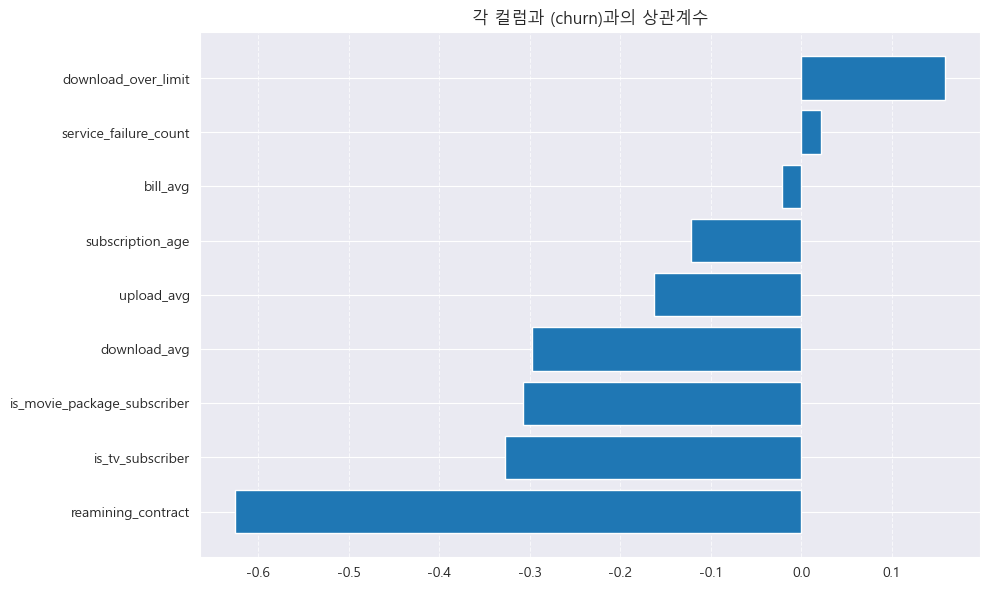

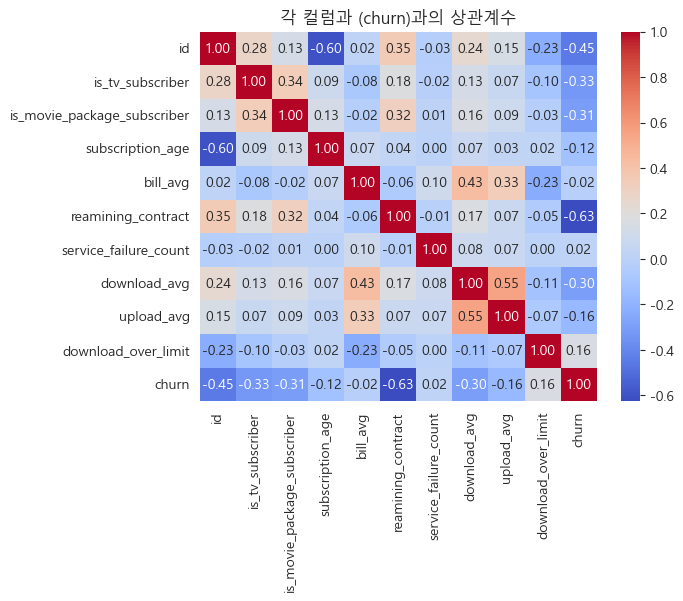

In [8]:

# 타겟컬럼(churn)과 상관계수 확인 id, churn 제외
# corr(numeric_only=True) - 수치형만 계산, -1과 가까울 수록 이탈확률이 커짐
relate = round(df.corr(numeric_only=True)['churn'].drop(['id', 'churn']).sort_values(ascending=True), 4)
relate_df = pd.DataFrame({
    '컬럼명' : relate.index,
    '상관계수' : relate.values
})
display(relate_df)

# # 상관계수 시각화
plt.figure(figsize=(10, 6))
plt.barh(relate_df['컬럼명'], relate_df['상관계수'])
plt.title('각 컬럼과 (churn)과의 상관계수')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('각 컬럼과 (churn)과의 상관계수')
plt.show()

In [9]:

# 결측치 확인 - 위 df.describe()에서 발견한 컬럼
# reamining_contract, download_avg, upload_avg
# reamining_contract
miss_reamining = pd.DataFrame([{
    '컬럼명': 'reamining_contract',
    '전체 개수': len(df['reamining_contract']),
    '결측치 수': df['reamining_contract'].isnull().sum(),
    '결측 비율 (%)': round(df['reamining_contract'].isnull().mean() * 100, 2)
}])

# download_avg
miss_download = pd.DataFrame([{
    '컬럼명': 'download_avg',
    '전체 개수': len(df['download_avg']),
    '결측치 수': df['download_avg'].isnull().sum(),
    '결측 비율 (%)': round(df['download_avg'].isnull().mean() * 100, 2)
}])

# upload_avg
miss_upload = pd.DataFrame([{
    '컬럼명': 'upload_avg',
    '전체 개수': len(df['upload_avg']),
    '결측치 수': df['upload_avg'].isnull().sum(),
    '결측 비율 (%)': round(df['upload_avg'].isnull().mean() * 100, 2)
}])

# concat - 하나의 표로 연결 - (ignore_index=True) 각 칼럼인덱스 무시
miss_df = pd.concat([miss_reamining, miss_download, miss_upload], ignore_index=True)
display(miss_df)

,컬럼명,전체 개수,결측치 수,결측 비율 (%)
0,reamining_contract,72274,21572,29.85
1,download_avg,72274,381,0.53
2,upload_avg,72274,381,0.53


NaN : 21572
0 : 16363
1 이상 : 34339


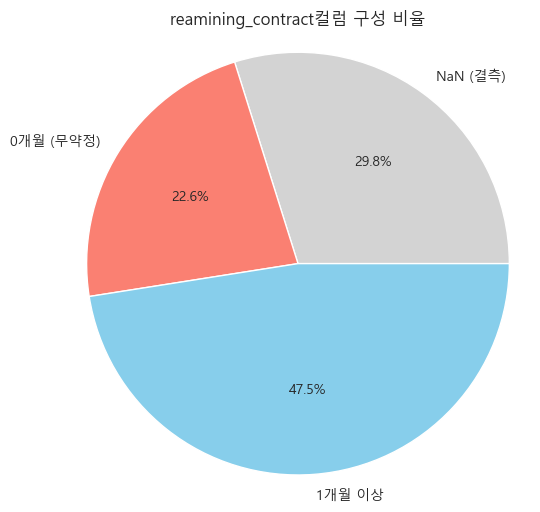

In [10]:

# 결측치가 30%정도인 reamining_contract 집중 분석
df['reamining_contract'].head(100)

# NaN과 0 그리고 나머지 의 수
nan_count = df['reamining_contract'].isna().sum()
zero_count = (df['reamining_contract'] == 0).sum()
other_count = df['reamining_contract'].notna().sum() - zero_count  # NaN 제외한 것 중 0이 아닌 나머지

print("NaN :", nan_count)
print("0 :", zero_count)
print("1 이상 :", other_count)

# 시각화 데이터
labels = ['NaN (결측)', '0개월 (무약정)', '1개월 이상']
counts = [nan_count, zero_count, other_count]

# 원형 차트 시각화
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['lightgray', 'salmon', 'skyblue'])7
plt.title('reamining_contract컬럼 구성 비율')
plt.axis('equal')
plt.show()

이슈
- reamining_contract은 타겟칼럼(churn)과 상관계수가 제일 높은 컬럼
- 결측치(NaN): 21,572개, 계약종료(0.0): 16,363개, 칼럼 중 NaN과 0은 대부분 이탈
- NaN을 결측처리할 수단에 대한 팀원 의견 필요함.

In [11]:
# 1. 결측치 처리 reamining_contract 72,274개 중 21,572개 29.85% 결측
# NaN - 팀원 의견 조율 후 처리
# NaN을 별도의 값(-1)로 결측처리 후 상관계수 변화(-0.6873), 기존은 (-0.6255)
#df['min1_fill_reamining_contract'] = df['reamining_contract'].fillna(-1)
#print(df['min1_fill_reamining_contract'].value_counts())
#correlation = df[['min1_fill_reamining_contract', 'churn']].corr()
#print(round(correlation.loc['min1_fill_reamining_contract', 'churn'], 4))
# 0.0으로 처리 후 결측치 처리 전과 같은 -0.6255
#df['fill_reamining_contract'] = df['reamining_contract'].fillna(0)
#print(df['fill_reamining_contract'].value_counts())
#correlation2 = df[['reamining_contract', 'churn']].corr()
#print(round(correlation2.loc['reamining_contract', 'churn'], 4))

# 결측치 NaN은 -1로 별도값으로 할 때 상관계수가 상승했음

In [12]:
# NaN을 0으로 결측처리
df['fill_reamining_contract'] = df['reamining_contract'].fillna(0)
print(df['fill_reamining_contract'].isnull().sum())

# 이하 두 결측치는 0.53% 비율로 모델학습에 영향이 거의 없어서 0으로 처리
# download_avg 72,274개 중 381개 0.53%
# 0.0로 채우고 처리한 컬럼 생성
df['fill_download_avg'] = df['download_avg'].fillna(0.0)
print(df['fill_download_avg'].isnull().sum())

# upload_avg 72,274개 중 381개 0.53%
# 0.0으로 채우고 처리한 컬럼 생성
df['fill_upload_avg'] = df['upload_avg'].fillna(0.0)
print(df['fill_upload_avg'].isnull().sum())

0
0
0


In [13]:
# 이상치

# 컬럼값이 이진형(0과 1)인 컬럼만 보기 - 이상치 없으니까
#binary_cols = [col for col in df.columns if set(df[col].dropna().unique()) <= {0, 1}]
# print(binary_cols)
# is_tv_subscriber, is_movie_package_subscriber, churn, + id 총 4개 컬럼 제외

# 이상치 처리 - 이건 내가
#reamining_contract
# 사분위수 (Q1, Q3) 계산
# Q1 = df['subscription_age'].quantile(0.25) # 데이터의 하위 25%
# Q3 = df['subscription_age'].quantile(0.75) # 데이터의 상위 25%
# # Interquartile Range 계산
# IQR = Q3 - Q1 # 데이터 중 중간 50%가 차지하는 범위
# # 이상치 경계 계산
# low_border = Q1 - 1.5 * IQR # Q1 아래로 1.5배 더 떨어진 값
# up_border = Q3 + 1.5 * IQR #  Q3 위로 1.5배 더 커진 값
#
# # 이상치 탐지 - low_num 보다 작거나 , up_num 보다 크면 이상치
# outliers = df[(df['subscription_age'] < low_border) | (df['subscription_age'] > up_border)]
# # 이상치 갯수와 비율
# outlier_count = outliers['subscription_age'].count()
# total_count = df['subscription_age'].notna().sum()
# outlier_ratio = round((outlier_count / total_count) * 100, 2)
#
# # 하한 이상치 수
# low_count = df[df['subscription_age'] < low_border]['subscription_age'].count()
# # 상한 이상치 수
# up_count = df[df['subscription_age'] > up_border]['subscription_age'].count()
#
# # 결과 요약
# iqr_subscription_age = pd.DataFrame({
#     '통계값': ['Q1 (25%)','Q3 (75%)','IQR','이상치 하한','이상치 상한',
#         '하한 미만 개수','상한 초과 개수','이상치 총 개수','이상치 비율 (%)'],
#     '값': [Q1,Q3,IQR,low_border,up_border,f'{low_count}개',f'{up_count}개',
#         f'{outlier_count}개',f'{outlier_ratio} %']
# })
# display(iqr_subscription_age)

# 이상치 분석 - 반려GPT가 도와줌
def get_outlier_summary(df, exclude=[]):

    summary_list = [] # 결과값 넣을 빈 리스트

    # 전체 컬럼 중에서 제외할 컬럼을 빼기
    exclude_cols = [col for col in df.columns if col not in exclude]
    for col in exclude_cols:
        # 해당 컬럼에서 결측치 제외
        series = df[col].dropna()
        # 사분위수 (Q1, Q3) 계산
        Q1 = series.quantile(0.25) # 데이터의 하위 25%
        Q3 = series.quantile(0.75) # 데이터의 상위 25%
        # Interquartile Range 계산
        IQR = Q3 - Q1 # 데이터 중간 50%가 차지하는 범위

        # 이상치 경계 계산
        low_border = Q1 - 1.5 * IQR # Q1아래로 1.5배 더 떨어진 값
        up_border = Q3 + 1.5 * IQR # Q3위로 1.5배 더 커진 값

        # 이상치 탐지 - low_num 보다 작거나 , up_num 보다 크면 이상치
        total_count = series.count() # 전체 유효 값 개수
        low_count = (series < low_border).sum() # 하한 미만 값 개수
        up_count = (series > up_border).sum() # 상한 초과 값 개수
        outlier_count = low_count + up_count # 총 이상치 수
        outlier_ratio = round((outlier_count / total_count) * 100, 2) # 이상치 비율 (%)

        # 요약 리스트에 추가
        summary_list.append({
            '컬럼명': col,
            '이상치 비율 (%)': outlier_ratio,
            'Q1 (25%)': round(Q1, 2),
            'Q3 (75%)': round(Q3, 2),
            'IQR': round(IQR, 2),
            '이상치 하한': round(low_border, 2),
            '이상치 상한': round(up_border, 2),
            '하한 미만 개수': low_count,
            '상한 초과 개수': up_count,
            '이상치 총 개수': outlier_count
        })

    return pd.DataFrame(summary_list)

# 제외할 컬럼 지정 - 불필요한 컬럼과 위에서 결측치 처리한 컬럼
# 결측치 처리전 원본 컬럼도 일단 뻬고
exclude_cols = ['is_tv_subscriber', 'is_movie_package_subscriber','reamining_contract', 'download_avg','upload_avg', 'churn', 'id']

# 함수 호출
result = get_outlier_summary(df, exclude=exclude_cols)

# 결과 확인
result_sorted = result.sort_values(by='이상치 비율 (%)', ascending=False)
display(result_sorted)

# 이상치 시각화
# plt.figure(figsize=(12, 7))
# plt.barh(result_sorted['컬럼명'], result_sorted['이상치 비율 (%)'])
# plt.xlabel('이상치 비율 (%)')
# plt.title('전체 컬럼별 이상치 비율 시각화 (IQR 기준)')
# plt.gca().invert_yaxis()
# plt.grid(True, axis='x', linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

,컬럼명,이상치 비율 (%),Q1 (25%),Q3 (75%),IQR,이상치 하한,이상치 상한,하한 미만 개수,상한 초과 개수,이상치 총 개수
2,service_failure_count,16.42,0.00,0.00,0.00,0.00,0.00,0,11867,11867
6,fill_upload_avg,6.73,0.50,4.80,4.30,-5.95,11.25,0,4864,4864
3,download_over_limit,5.40,0.00,0.00,0.00,0.00,0.00,0,3901,3901
5,fill_download_avg,4.84,6.40,60.20,53.80,-74.30,140.90,0,3499,3499
1,bill_avg,4.65,13.00,22.00,9.00,-0.50,35.50,0,3363,3363
0,subscription_age,4.39,0.93,3.30,2.37,-2.62,6.86,0,3175,3175
4,fill_reamining_contract,0.02,0.00,1.04,1.04,-1.56,2.60,0,13,13


이상치 중 칼럼 별 알맞은 함수와 이상치 비율이 미미한 컬럼은 나중에 학습단계에서 스켈링으로 처리하는게 어떨지 고민 후 진행하겠음


In [14]:
# subscription_age의 음수값 확인 (-0.02가 한개 발견, 지워버림)
# df['subscription_age'].value_counts()
# min_value = df['subscription_age'].min() # 최소값이 뭔지
# min_count = (df['subscription_age'] == min_value).sum() # 최소값 개수
#
# print(min_value)
# print(min_count)

# 이상치 -0.02를 제거한 새로운 컬럼 생성
df['cut_subscription_age'] = df['subscription_age'].where(df['subscription_age'] >= 0)
min_value2 = df['cut_subscription_age'].min()
print(min_value2)

0.0


In [15]:
# (0,1 이진값)is_tv_subscriber의 이탈률
# 성규님이 시각화 잘 하셔서 난 수치화로
# tv서비스 (무 가입자 약 89% 이탈) (가입자 약 47% 이탈)
churn_tv = df.groupby('is_tv_subscriber')['churn'].mean()
churn_tv

is_tv_subscriber
0    0.896195
1    0.476630
Name: churn, dtype: float64

In [16]:
# (0,1 이진값)is_movie_package_subscriber 이탈률
# 영화서비스 (무 가입자 약 66% 이탈) (가입자 약 33% 이탈)
churn_movie = df.groupby('is_movie_package_subscriber')['churn'].mean()
churn_movie

is_movie_package_subscriber
0    0.662418
1    0.338846
Name: churn, dtype: float64

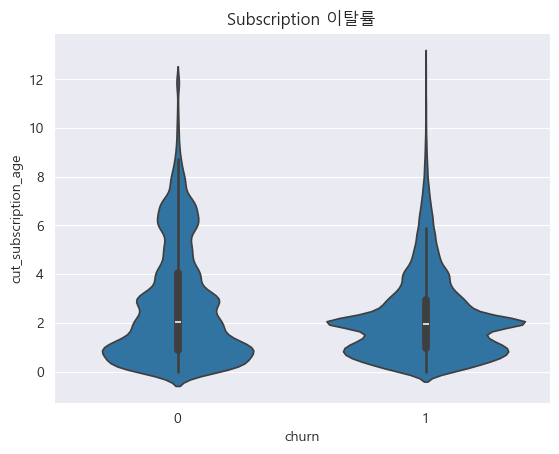

In [17]:
# (가입기간 범주형)cut_subscription_age
churn_sub = df.groupby('cut_subscription_age')['churn'].mean()
churn_sub

# 걀과값 해석이 어려워 시각화 해봄
sns.violinplot(data=df, x='churn', y='cut_subscription_age')
plt.title("Subscription 이탈률")
plt.show()


In [18]:
# service_failure_count
# 고장 횟수가 증가할수록 이탈률 증가
churn_fail = df.groupby('service_failure_count')['churn'].mean()
print(churn_fail)

service_failure_count
0     0.552320
1     0.543118
2     0.592336
3     0.570477
4     0.643038
5     0.641791
6     0.690722
7     0.706897
8     0.621622
9     0.823529
10    0.666667
11    0.666667
12    0.333333
13    0.800000
14    0.750000
15    1.000000
16    0.333333
18    1.000000
19    1.000000
Name: churn, dtype: float64


In [19]:
# bill_avg
# churn_bill = df.groupby('bill_avg')['churn'].mean()
# churn_bill
# 컬럼값이 연속형이라 10개의 구간으로 나누어 실행
# 0 무료거나 계약이 끝난 고객의 이탈률 높고 고가 요금제는 이탈률이 적음, 그 외 요제제에 따른 이탈률 변화는 큰 상관이 없어 보임
df['cut_bill_avg'] = pd.cut(df['bill_avg'], bins=[-1, 0, 10, 20, 30, 40, 50, 60, 70, 100, float('inf')],
                            labels=['0', '1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-100', '100+'])

# 구간별 평균 이탈률 계산
churn_cut_bill = df.groupby('cut_bill_avg',observed=True)['churn'].mean().reset_index()
churn_cut_bill

,cut_bill_avg,churn
0,0,0.926542
1,1-10,0.546201
2,11-20,0.451936
3,21-30,0.593471
4,31-40,0.616105
5,41-50,0.598765
6,51-60,0.724858
7,61-70,0.620321
8,71-100,0.672131
9,100+,0.469136


In [20]:
# download_avg
# churn_down = df.groupby('fill_download_avg')['churn'].mean()
# churn_down
# 다운로드를 많이 사용하면 이탈률 적고 소극적 사용이면 이탈률 높아짐
df['bin_fill_down'] = pd.cut(df['fill_download_avg'], bins=[-1, 0, 10, 20, 30, 40, 50, 60, 70, 100, float('inf')],
                            labels=['0', '1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-100', '100+'])

# 구간별 평균 이탈률 계산
churn_fill_down = df.groupby('bin_fill_down',observed=True)['churn'].mean().reset_index()
churn_fill_down

,bin_fill_down,churn
0,0,0.964317
1,1-10,0.769713
2,11-20,0.621606
3,21-30,0.507151
4,31-40,0.433328
5,41-50,0.408572
6,51-60,0.360754
7,61-70,0.347864
8,71-100,0.313905
9,100+,0.256703


In [21]:
# fill_upload_avg
# 업로드를 아예 사용하지 않으면 이탈률이 높지만 사용자의 데이터별 이탈률은 비슷합
df['bin_fill_up'] = pd.cut(df['fill_upload_avg'], bins=[-1, 0, 10, 20, 30, 40, 50, 60, 70, 100, float('inf')],
                            labels=['0', '1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-100', '100+'])

# 구간별 평균 이탈률 계산
churn_fill_up = df.groupby('bin_fill_up',observed=True)['churn'].mean().reset_index()
churn_fill_up

,bin_fill_up,churn
0,0,0.958689
1,1-10,0.488156
2,11-20,0.319806
3,21-30,0.395379
4,31-40,0.366242
5,41-50,0.366864
6,51-60,0.352381
7,61-70,0.346667
8,71-100,0.427273
9,100+,0.404762


In [22]:
# download_over_limit
# 다운로드 한계치를 많이 경험한 사람일수록 이탈률이 높음
churn_over = df.groupby('download_over_limit',observed=True)['churn'].mean()
churn_over

download_over_limit
0    0.535284
1    0.736292
2    0.812500
3    0.895582
4    0.929825
5    0.925408
6    0.962209
7    0.998016
Name: churn, dtype: float64

In [23]:
# 업로드나 다운로드를 많이 사용하는 heavy유저의 tv나 영화 가입률 확인

# download, upload 상위25% 사용자
down_king = df['download_avg'].quantile(0.75)
up_king = df['upload_avg'].quantile(0.75)

# 상위 25%의 heavy 다운로더, 업로더 칼럼 생성
df['heavy_downloader'] = df['download_avg'] >= down_king
df['heavy_uploader'] = df['upload_avg'] >= up_king

# heavy 다운로더의 tv, 영화 가입률
heavy_down_tv = df.groupby('heavy_downloader')['is_tv_subscriber'].mean()
heavy_down_movie = df.groupby('heavy_downloader')['is_movie_package_subscriber'].mean()

# heavy 업로더의 tv, 영화 가입률
heavy_up_tv = df.groupby('heavy_uploader')['is_tv_subscriber'].mean()
heavy_up_movie = df.groupby('heavy_uploader')['is_movie_package_subscriber'].mean()

print('heavy다운 유저 tv 가입률 "',heavy_down_tv)
print('heavy다운 유저 영화 가입률 "',heavy_down_movie)
print('heavy업로드 유저 tv 가입률 "',heavy_up_tv)
print('heavy업로두 유저 영화 가입률 "',heavy_up_movie)

# summary_df = pd.DataFrame({
#     '구분': ['다운로드 ↓', '다운로드 ↑', '업로드 ↓', '업로드 ↑'],
#     'TV 가입률': [
#         round(heavy_down_tv[False], 4),
#         round(heavy_down_tv[True], 4),
#         round(heavy_up_tv[False], 4),
#         round(heavy_up_tv[True], 4)
#     ],
#     '영화 패키지 가입률': [
#         round(heavy_down_movie[False], 4),
#         round(heavy_down_movie[True], 4),
#         round(heavy_up_movie[False], 4),
#         round(heavy_up_movie[True], 4)
#     ]
# })
# display(summary_df)


heavy다운 유저 tv 가입률 " heavy_downloader
False    0.783123
True     0.912328
Name: is_tv_subscriber, dtype: float64
heavy다운 유저 영화 가입률 " heavy_downloader
False    0.285038
True     0.484424
Name: is_movie_package_subscriber, dtype: float64
heavy업로드 유저 tv 가입률 " heavy_uploader
False    0.785241
True     0.903091
Name: is_tv_subscriber, dtype: float64
heavy업로두 유저 영화 가입률 " heavy_uploader
False    0.291358
True     0.461242
Name: is_movie_package_subscriber, dtype: float64


성규님이 상관수치를 시각화 하시고 이미 인사이트까지 완벽하게 하셔서 저는 수치화를 해봤음요.
조금 다른 거 구해보려고 heavy 유저의 영화, tv패키지 가입률을 확인 했는데 가입률이 높아서, 역시 적극 사용자가 부가서비스 가입률도 높고, 부가서비스 가입률이 높은 유저가 이탈률도 적다는 사소한 인사이트 발견